In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# 피쳐 스케일링
# 0 ~ 1 범위로 만듭니다.
x_train = np.reshape(x_train / 255, (-1, 28, 28, 1))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1))

In [ ]:
print(f'x_train.shape: {x_train.shape}, x_test.shape: {x_test.shape}')

x_train.shape: (60000, 28, 28, 1), x_test.shape: (10000, 28, 28, 1)


In [ ]:
# 정답(타켓) 레이블링
# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(f'y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}')

y_train.shape: (60000, 10), y_test.shape: (10000, 10)


In [ ]:
# 검증 데이터셋을 만듭니다.
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.3, random_state=777)

In [ ]:
print(f'x_train.shape: {x_train.shape}, x_test.shape: {x_test.shape}, x_val.shape: {x_val.shape}')
print(f'y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}, y_val.shape: {y_val.shape}')

x_train.shape: (42000, 28, 28, 1), x_test.shape: (10000, 28, 28, 1), x_val.shape: (18000, 28, 28, 1)
y_train.shape: (42000, 10), y_test.shape: (10000, 10), y_val.shape: (18000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

# 이전과 다르게 리스트 형태로 층을 구성해볼 수 있습니다.
model = Sequential([
    # 항상 모델의 첫 번째 층은 입력의 형태를 명시해주어야 합니다.
    Conv2D(filters = 16, kernel_size = 3, strides = (1, 1),
           padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters = 32, kernel_size = 3, strides = (1, 1),
           padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters = 64, kernel_size = 3, strides = (1, 1),
           padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
          epochs = 5,
          batch_size = 128,
          validation_data = (x_val, y_val))

Epoch 1/5
329/329 [==============================] - 4s 7ms/step - loss: 0.2712 - acc: 0.9020 - val_loss: 0.3108 - val_acc: 0.8869
Epoch 2/5
329/329 [==============================] - 2s 7ms/step - loss: 0.2526 - acc: 0.9079 - val_loss: 0.2657 - val_acc: 0.9064
Epoch 3/5
329/329 [==============================] - 2s 7ms/step - loss: 0.2345 - acc: 0.9145 - val_loss: 0.2851 - val_acc: 0.9011
Epoch 4/5
329/329 [==============================] - 2s 6ms/step - loss: 0.2179 - acc: 0.9202 - val_loss: 0.2486 - val_acc: 0.9120
Epoch 5/5
329/329 [==============================] - 2s 6ms/step - loss: 0.2087 - acc: 0.9230 - val_loss: 0.2438 - val_acc: 0.9122


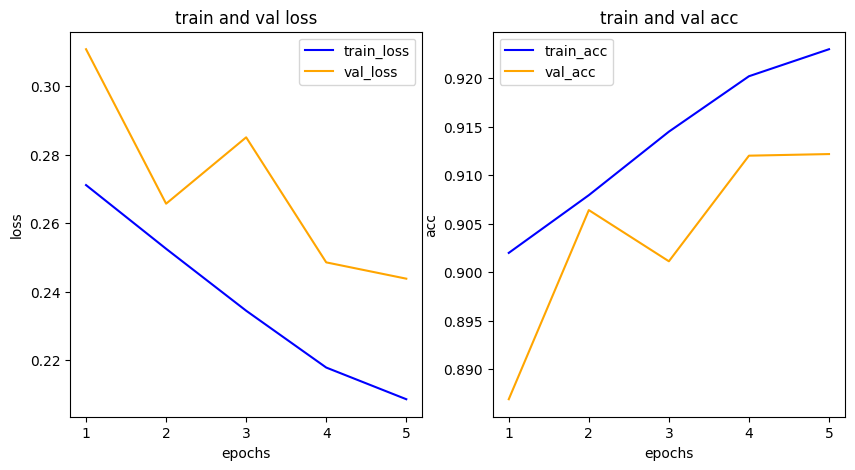

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
model.summary() # 모델의 구조를 확인합니다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

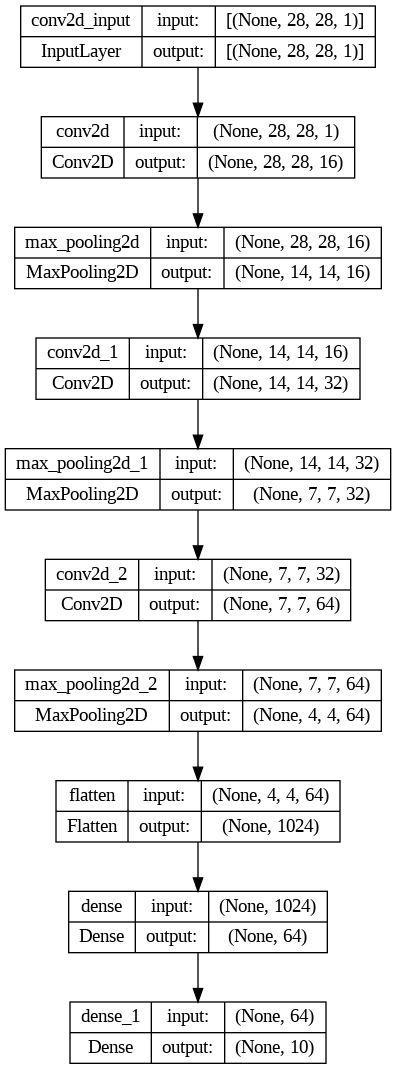

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes=True)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2667 - acc: 0.9033


[0.2667284607887268, 0.9032999873161316]